In [28]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
import torch.nn.functional as F

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
])

In [3]:
dataset = datasets.MNIST(
    '/tmp/mnist', 
    download=True, 
    train=True,
    transform=transform
)

test_dataset = datasets.MNIST(
    '/tmp/mnist', 
    download=True, 
    train=False,
    transform=transform
)

batched_dataset = torch.utils.data.DataLoader(
    dataset,
    batch_size=32
)

batched_test_dataset = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=32
)

Processing...
Done!


In [4]:
dataiter = iter(batched_dataset)
images, labels = dataiter.next()

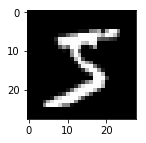

In [5]:
plt.figure(figsize=(2,2))
plt.imshow(images[0].numpy().squeeze(), cmap='gray')
plt.show()

In [23]:
class MLPModel(torch.nn.Module):
    def __init__(self, inputs=28*28, outputs=10, hiddens=1024, activation=torch.relu):
        super(MLPModel, self).__init__()
        self.activation = activation
        self.fc1 = torch.nn.Linear(inputs, hiddens)
        self.fc2 = torch.nn.Linear(hiddens, outputs)
        
        
    def forward(self, x):
        x = x.view(-1, 28 * 28)
        h = self.fc1(x)
        h = self.activation(h)
        logits = self.fc2(h)
        return logits

In [58]:
m = MLPModel()
optimizer = torch.optim.SGD(m.parameters(), lr=1e-3)
loss = torch.nn.Softmax

NUM_BATCHES = 5000
REPORT_EVERY_I = 250
TEST_EVERY_I = 500
updates = 0
eloss = None
EMA_ALPHA = 0.1
losses = []


In [59]:
losses = list()
for images, labels in batched_dataset:
    optimizer.zero_grad()
    

    logits = m(images)

    loss = F.cross_entropy(logits, labels)
    losses.append(loss.detach().numpy())
    if eloss is None:
        eloss = loss.detach().numpy()
    else:
        eloss = eloss * (1 - EMA_ALPHA) + loss.detach().numpy() * EMA_ALPHA
    
    losses.append(eloss)
    
    loss.backward()
    optimizer.step()
    

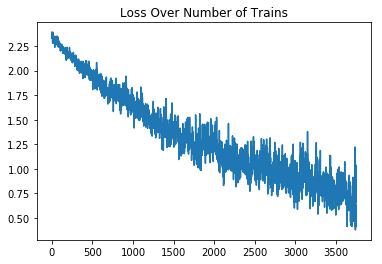

In [62]:
plt.title('Loss Over Number of Trains')
plt.plot(losses)
plt.show()